We will probably limit ourselves to looking at array access times in a 13 grid size benchmark environment. In principle, the size of the array should make no difference to read time anyway, but, since we are looking at the grid size = 13 case for MILP solution times in the report, this is a reasonably justifiable choice.

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fig_specs as fsp
# enable interactive plots
%matplotlib widget

method = 'dp'
grid_size = 13
ID = 4

policy_array_file = f'benchmark-policies/4d/{method}/{grid_size}{ID}_wind_0,9_policy_array.npy'
policy_array = np.load(policy_array_file)

In [160]:
import time

no_samples = 1000000
test_state = np.array([10, 0, 3, 3])

np_access_times_ns = np.zeros(shape=no_samples)
for i in range(no_samples):
    st = time.process_time_ns()
    policy_array[tuple(test_state)] # remember to remove the assignment, which might add an appreciable (in this context) time penalty
    et = time.process_time_ns()
    np_access_times_ns[i] = et - st

df_access_times_ns = pd.Series(np_access_times_ns)

# drop outliers
#df_access_times_ns = df_access_times_ns[df_access_times_ns <= df_access_times_ns.quantile(0.99999)]


In [168]:
for i in range(10):
    threshold = i * 1000
    print(f'Number of records with time above or equal to {threshold} ns: {df_access_times_ns[df_access_times_ns >= threshold].count()}')

Number of records with time above or equal to 0 ns: 1000000
Number of records with time above or equal to 1000 ns: 773259
Number of records with time above or equal to 2000 ns: 220796
Number of records with time above or equal to 3000 ns: 629
Number of records with time above or equal to 4000 ns: 561
Number of records with time above or equal to 5000 ns: 505
Number of records with time above or equal to 6000 ns: 454
Number of records with time above or equal to 7000 ns: 381
Number of records with time above or equal to 8000 ns: 314
Number of records with time above or equal to 9000 ns: 275


<AxesSubplot: >

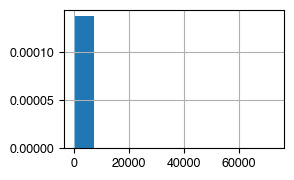

In [130]:
fig, ax = plt.subplots(figsize=(fsp.text_width * fsp.text_width_factor, 1.8))
df_access_times_ns.hist(density=True)

In [131]:
df_access_times_ns.quantile(0.99)

1000.0